In [1]:
library('tidyverse')
library('ggbeeswarm')
library('readxl')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
count_matrix <-
    read_xlsx('./Q3.xlsx', sheet='TargetCountMatrix')

sample_metadata <-
    tibble(
        `Sample`=
            count_matrix %>%
            select(-`TargetName`) %>%
            colnames()
    ) %>%
    separate(`Sample`, c('group_name', 'region_no', 'compartment'), sep=' \\| ', remove=FALSE) %>%
    mutate(
        `sample_no`=if_else(
            parse_integer(`region_no`) < 7,
            '1',
            '2'
        ),
        `short_cond`=case_when(
            startsWith(`group_name`, 'Obsidian Treat Off') ~ 'off',
            startsWith(`group_name`, 'Obsidian Treat On') ~ 'on',
            startsWith(`group_name`, 'Conv Treat') ~ 'conv'
        )
    ) %>%
    relocate(`short_cond`, .after=`group_name`)

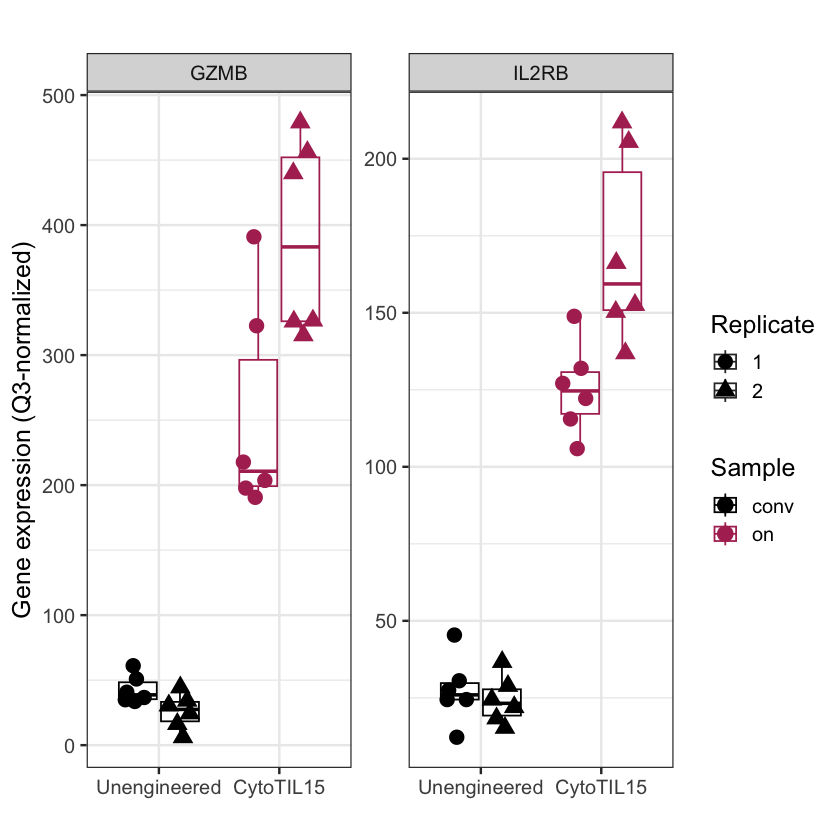

In [3]:
count_matrix %>%
    filter(`TargetName` %in% c('GZMB', 'IL2RB')) %>%
    pivot_longer(-`TargetName`, names_to='Sample', values_to='norm_count') %>%
    left_join(sample_metadata, by='Sample') %>%
    filter(
        `compartment` == 'Immune',
        `short_cond` != 'off'
    ) %>%
    ggplot(aes(x=`short_cond`, y=`norm_count`, shape=`sample_no`, color=`short_cond`)) +
        geom_boxplot(alpha=.3, width=.7, outlier.shape=NA) +
        geom_quasirandom(dodge.width=.8, size=4) +
        scale_x_discrete(label=c('Unengineered', 'CytoTIL15')) +
        facet_wrap(~`TargetName`, scale='free_y') +
        labs(
            x='',
            y='Gene expression (Q3-normalized)',
            title='',
            shape='Replicate',
            color='Sample'
        ) +
        theme_bw(base_size=15) +
        scale_color_manual(values=c('black', 'maroon'))